# Proyecto de petróleo OilyGiant

# Descripcion del proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.

Crear un modelo para predecir el volumen de reservas en pozos nuevos.

Elegir los pozos petrolíferos que tienen los valores estimados más altos.

Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

# Condiciones

* Solo la regresión lineal es adecuada para el entrenamiento de modelos (el resto no son lo suficientemente predecibles).

* Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.

* El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.

* Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

* Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

# Descripcion de los datos

Los datos de exploración geológica de las tres regiones se almacenan en archivos:

* geo_data_0.csv. 
* geo_data_1.csv. 
* geo_data_2.csv. 

id — identificador único de pozo de petróleo.

f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas).

product — volumen de reservas en el pozo de petróleo (miles de barriles).

# Instrucciones del proyecto

## Descarga y prepara los datos. Explica el procedimiento.

## Entrena y prueba el modelo para cada región en geo_data_0.csv

### Divide los datos en un conjunto de entrenamiento y un conjunto de validación en una proporción de 75:25

### Entrena el modelo y haz predicciones para el conjunto de validación.

### Guarda las predicciones y las respuestas correctas para el conjunto de validación.

### Muestra el volumen medio de reservas predicho y RMSE del modelo.

### Analiza los resultados.

### Coloca todos los pasos previos en funciones, realiza y ejecuta los pasos 2.1-2.5 para los archivos 'geo_data_1.csv' y 'geo_data_2.csv'.

## Prepárate para el cálculo de ganancias

### Almacena todos los valores necesarios para los cálculos en variables separadas.

### Dada la inversión de 100 millones por 200 pozos petrolíferos, de media un pozo petrolífero debe producir al menos un valor de 500,000 dólares en unidades para evitar pérdidas (esto es equivalente a 111.1 unidades). Compara esta cantidad con la cantidad media de reservas en cada región.

### Presenta conclusiones sobre cómo preparar el paso para calcular el beneficio.

## Escribe una función para calcular la ganancia de un conjunto de pozos de petróleo seleccionados y modela las predicciones

### Elige los 200 pozos con los valores de predicción más altos de cada una de las 3 regiones (es decir, archivos 'csv').

### Resume el volumen objetivo de reservas según dichas predicciones. Almacena las predicciones para los 200 pozos para cada una de las 3 regiones.

### Calcula la ganancia potencial de los 200 pozos principales por región. Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección.

## Calcula riesgos y ganancias para cada región

### Utilizando las predicciones que almacenaste en el paso 4.2, emplea la técnica del bootstrapping con 1000 muestras para hallar la distribución de los beneficios. 

### Encuentra el beneficio promedio, el intervalo de confianza del 95% y el riesgo de pérdidas. La pérdida es una ganancia negativa, calcúlala como una probabilidad y luego exprésala como un porcentaje.

### Presenta tus conclusiones: propón una región para el desarrollo de pozos petrolíferos y justifica tu elección. ¿Coincide tu elección con la elección anterior en el punto 4.3?

# Importacion de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import plotly.express as px
import requests
from bs4 import BeautifulSoup
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

# Lectura de los datos

In [2]:
data_0 = pd.read_csv("/datasets/geo_data_0.csv")
data_1 = pd.read_csv("/datasets/geo_data_1.csv")
data_2 = pd.read_csv("/datasets/geo_data_2.csv")

# Preparacion de datos

## revision de datos

In [3]:
print(data_0.info(), data_1.info(), data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null 

In [4]:
print(data_0.sample(10))

          id        f0        f1        f2     product
69321  Pv8bV  0.749325 -0.426935  3.647096   48.773589
78476  f0tzS -0.083002  0.482160  2.801727   87.344781
26816  NoML0  0.280400 -0.166455  1.290272   61.867771
8863   d960V -0.019709  0.174352 -0.687293   77.379344
84816  81SWa  1.172163 -0.362424 -1.024993   24.913046
68829  Uth5d  0.101899  1.175975  5.311665  130.082500
94723  40IIY  0.956322  0.257905  6.902242   86.491797
18646  CYIvE -0.049077  0.406130  7.315677  154.842834
20554  HqhZQ  1.985105  0.259467  0.013170   68.817006
62389  NkfNB  0.913524 -0.424796  4.038193  120.697236


In [5]:
print(data_1.sample(10))

          id         f0        f1        f2     product
75773  L1JXV   1.845630 -5.848889  4.003873  107.813044
45713  LZQw9 -12.875159 -2.606007  0.996361   30.132364
31322  pFMfO  -7.047510 -0.789093  1.992806   57.085625
15819  2kHNj  -6.491001 -3.448573  0.987696   30.132364
26341  NWEhs   6.175621  4.168427  3.995834  107.813044
12345  4DV4q   9.079967 -3.381034  3.997362  107.813044
29054  jXUfQ   9.961560  8.565066  0.996362   26.953261
85204  X0Csa -12.197168 -7.311985  0.998453   30.132364
33596  D5aMY -13.501149 -0.536351  0.998566   30.132364
96418  avQ8Z   6.355363 -5.886002  3.011099   80.859783


In [6]:
print(data_2.sample(10))

          id        f0        f1         f2     product
26360  iQ4zA -0.469827  0.503669  -2.557565    0.621944
2595   Tc0K6  0.728137  1.843353  12.140606  118.613726
31376  Bx2ng  1.277842 -3.685141   4.369521   58.547667
26994  eFO1y  0.193375  0.032026   1.010467   62.915606
65184  gHs8x -0.158251  0.093654   2.688267   63.521695
89164  hkiPV -1.166501 -1.398433   8.613914  113.558882
74819  bgHNz -3.897136 -0.685045   5.687543   87.797487
57676  w2W7h  0.297416  1.631913   5.048092   67.865092
60020  H13Bs -1.644878 -0.583822   6.333070  135.546143
36631  R9mLp  2.047125 -0.251930   1.354543  126.269129


In [7]:
#miraremos que no hayan duplicados y datos ausentes en la siguiente parte.

print("la cantidad de datos duplicados de data_0 es:", data_0.duplicated().sum())
print("la cantidad de datos duplicados de data_1 es:", data_1.duplicated().sum())
print("la cantidad de datos duplicados de data_2 es:", data_2.duplicated().sum())

la cantidad de datos duplicados de data_0 es: 0
la cantidad de datos duplicados de data_1 es: 0
la cantidad de datos duplicados de data_2 es: 0


No se han encontrado datos duplicados en esta parte

In [8]:
#Ahora verificamos si hay datos ausentes

print("la cantidad de datos ausentes de data_0 es:",data_0.isna().sum())

print("la cantidad de datos ausentes de data_1 es:",data_1.isna().sum())

print("la cantidad de datos ausentes de data_2 es:",data_2.isna().sum())

la cantidad de datos ausentes de data_0 es: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
la cantidad de datos ausentes de data_1 es: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
la cantidad de datos ausentes de data_2 es: id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


No se han encontrado datos ausentes.

## Distribucion de cada variable por cada tipo de localizacion de la data

### Distribucion para las variables de data_0

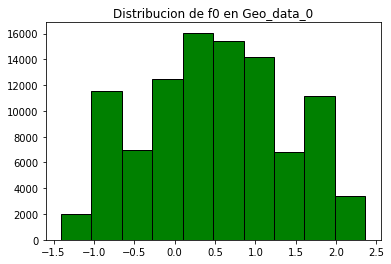

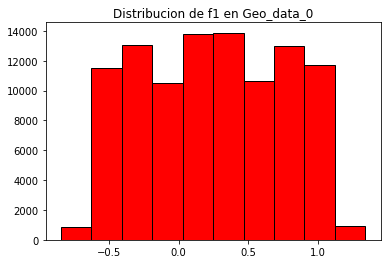

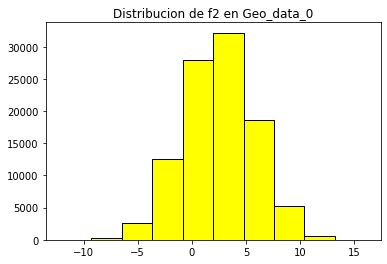

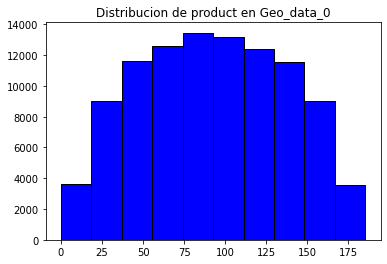

In [56]:
plt.hist(data_0["f0"], color="green", ec="black")
plt.title("Distribucion de f0 en Geo_data_0")
plt.show()
plt.hist(data_0["f1"], color="red", ec="black")
plt.title("Distribucion de f1 en Geo_data_0")
plt.show()
plt.hist(data_0["f2"], color="yellow", ec="black")
plt.title("Distribucion de f2 en Geo_data_0")
plt.show()
plt.hist(data_0["product"], color="blue", ec="black")
plt.title("Distribucion de product en Geo_data_0")
plt.show()

### Distribucion para las variables de data_1

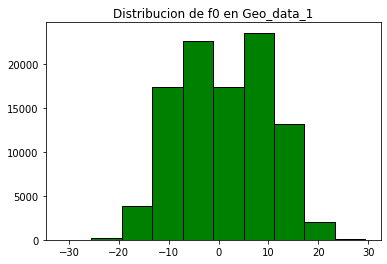

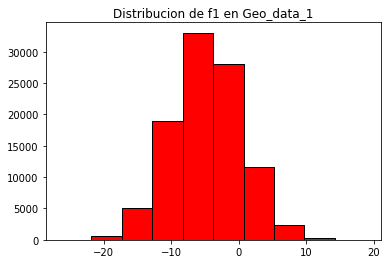

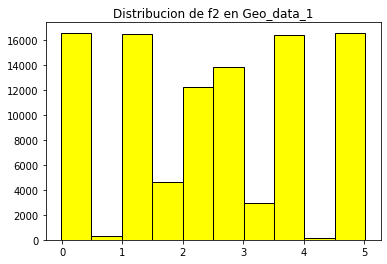

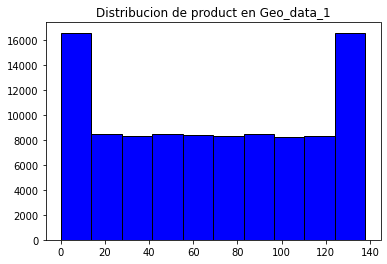

In [57]:
plt.hist(data_1["f0"], color="green", ec="black")
plt.title("Distribucion de f0 en Geo_data_1")
plt.show()
plt.hist(data_1["f1"], color="red", ec="black")
plt.title("Distribucion de f1 en Geo_data_1")
plt.show()
plt.hist(data_1["f2"], color="yellow", ec="black")
plt.title("Distribucion de f2 en Geo_data_1")
plt.show()
plt.hist(data_1["product"], color="blue", ec="black")
plt.title("Distribucion de product en Geo_data_1")
plt.show()

### Distribucion para las variables de data_2

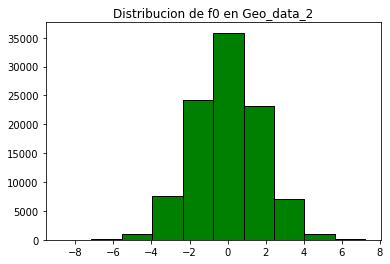

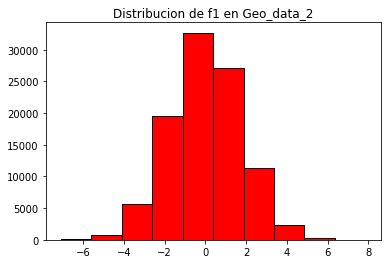

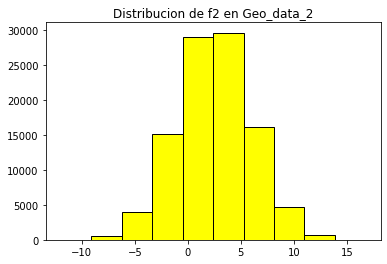

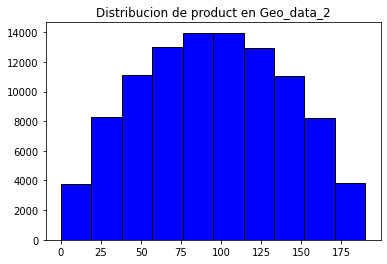

In [58]:
plt.hist(data_2["f0"], color="green", ec="black")
plt.title("Distribucion de f0 en Geo_data_2")
plt.show()
plt.hist(data_2["f1"], color="red", ec="black")
plt.title("Distribucion de f1 en Geo_data_2")
plt.show()
plt.hist(data_2["f2"], color="yellow", ec="black")
plt.title("Distribucion de f2 en Geo_data_2")
plt.show()
plt.hist(data_2["product"], color="blue", ec="black")
plt.title("Distribucion de product en Geo_data_2")
plt.show()

# Segmentacion de datos

In [9]:
data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [10]:
features = data_0.drop(['id', 'product'], axis=1)
target = data_0['product']

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(features, target, test_size=0.75, random_state=12345) 
#se segmenta el 75 % de los datos para hacer el conjunto de validación

In [11]:
features = data_1.drop(['id', 'product'], axis=1)
target = data_1['product']

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(features, target, test_size=0.75, random_state=12345) 
#se segmenta el 75 % de los datos para hacer el conjunto de validación

In [12]:
features = data_2.drop(['id', 'product'], axis=1)
target = data_2['product']

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(features, target, test_size=0.75, random_state=12345) 
#se segmenta el 75 % de los datos para hacer el conjunto de validación

# Entrenamiento y prueba de modelo para cada region

In [13]:
model_0 = LinearRegression() # inicializa el constructor de modelos
model_0.fit(features_train_0, target_train_0) # entrena el modelo en el conjunto de entrenamiento
predictions_valid = model_0.predict(features_valid_0) # obtén las predicciones del modelo en el conjunto de validación

recm_0 = mean_squared_error(target_valid_0, predictions_valid)**0.5
df_0 = pd.DataFrame({"predictions":predictions_valid, "target":target_valid_0})
print( "RECM del modelo de regresión lineal en el conjunto de validación:", recm_0)
print( "El volumen medio de reservas predicho es:", predictions_valid.mean())

RECM del modelo de regresión lineal en el conjunto de validación: 37.70188872577138
El volumen medio de reservas predicho es: 92.56773277214636


# Funcion para data_1 y data_2

In [14]:
def split_train(f_train, t_train, f_valid, t_valid, model):
    recm = []
    predict_mean = []
    predict_sum = []
    model.fit(f_train, t_train)
    predictions_valid = model.predict(f_valid)
    recm.append(mean_squared_error(t_valid, predictions_valid)**0.5)
    predict_mean.append(predictions_valid.mean())
    predict_sum.append(predictions_valid.sum())
    df = pd.DataFrame({"predictions":predictions_valid, "target":t_valid})
    print( "RECM del modelo de regresión lineal en el conjunto de validación:", recm)
    print( "El volumen medio de reservas predicho es:", predict_mean)
    print( " El volumen total de reservas predicho es:", predict_sum)
    return df

Utilizamos nuestra funcion con el resto de los conjuntos de datos

In [15]:
#resultado de data_0
print( "RECM del modelo de regresión lineal en el conjunto de validación:", recm_0)
print( "El volumen medio de reservas predicho es:", predictions_valid.mean())

RECM del modelo de regresión lineal en el conjunto de validación: 37.70188872577138
El volumen medio de reservas predicho es: 92.56773277214636


In [16]:
#funcion con data_1
df_1 = split_train(features_train_1, target_train_1, features_valid_1, target_valid_1, LinearRegression())

RECM del modelo de regresión lineal en el conjunto de validación: [0.8914237412897416]
El volumen medio de reservas predicho es: [68.81242584774002]
 El volumen total de reservas predicho es: [5160931.938580501]


In [17]:
#funcion con data_2
df_2 = split_train(features_train_2, target_train_2, features_valid_2, target_valid_2, LinearRegression())

RECM del modelo de regresión lineal en el conjunto de validación: [40.03777476932527]
El volumen medio de reservas predicho es: [94.94516837037592]
 El volumen total de reservas predicho es: [7120887.627778194]


# Analisis de resultados

Me parece que lo mas destacable hasta este punto es que en el conjunto de datos (data_0 y data_2) tienen un recm bastante alto en comparacion de data_1.
A su vez, el conjunto con el recm mas bajo tiene una media mucho mas baja que el otro par de cojuntos.

# Calculo de ganancias

In [18]:
#Funcion para el calculo de los mejores pozos de cada region
def best_product(data):
    best = data.sort_values(by="predictions", ascending=False).head(200)
    best_1 = best["predictions"]
    return (best, best_1)

## Mejores 200 pozos de cada region

In [19]:
best_product_0_all, best_product_0  = best_product(df_0)
print(best_product_0)
print(" ")
print(best_product_0.min())

93073    179.671107
52356    177.057387
78948    175.813948
46784    175.707604
27658    175.660226
            ...    
14128    155.550305
36122    155.540119
92200    155.525498
87693    155.518817
70875    155.515703
Name: predictions, Length: 200, dtype: float64
 
155.515703025064


In [20]:
best_product_1_all, best_product_1 = best_product(df_1)
print(best_product_1)
print(" ")
print(best_product_1.min())

26531    140.341055
80439    139.967300
55165    139.887370
42738    139.844937
38665    139.809686
            ...    
62220    138.778178
21923    138.777818
84722    138.777079
37752    138.776965
16330    138.776851
Name: predictions, Length: 200, dtype: float64
 
138.77685107509058


In [21]:
best_product_2_all, best_product_2 = best_product(df_2)
print(best_product_2)
print(" ")
print(best_product_2.min())

3540     176.941406
25463    173.825169
69502    173.536031
6647     173.454197
39274    172.370730
            ...    
82424    149.367783
71049    149.345153
50961    149.321246
51230    149.297792
30785    149.277850
Name: predictions, Length: 200, dtype: float64
 
149.27785036633304


## Cantidad media de produccion de cada region

In [22]:
mean_0 = data_0["product"].mean()
mean_0

92.50000000000001

In [23]:
mean_1 = data_1["product"].mean()
mean_1

68.82500000000002

In [24]:
mean_2 = data_2["product"].mean()
mean_2

95.00000000000004

## Conclusiones

Hasta este punto analizamos cuales son los mejores 200 pozos de cada region, podemos observar que los mejores 200 se encuentran por encima de la media de cada region. De hecho los 600 pozos estan por encima del minimo que es 111.1.

# Funcion para el calculo de ganancia y modelo de predicciones

## funcion

In [25]:
def profit(data, outlay=100000000):
    gross_profit = data
    gross_profit = gross_profit["predictions"]
    gross_profit = (gross_profit.sum() * 4500)
    op_profit = (gross_profit - outlay)
    return op_profit

## calculo de ganancias potenciales

In [26]:
profit_0 = profit(df_0)
print("la ganancia potencial de la region 0 es de:", profit_0)

la ganancia potencial de la region 0 es de: 31141609810.5994


In [27]:
profit_1 = profit(df_1)
print("la ganancia potencial de la region 1 es de:", profit_1)

la ganancia potencial de la region 1 es de: 23124193723.612255


In [28]:
profit_2 = profit(df_2)
print("la ganancia potencial de la region 2 es de:", profit_2)

la ganancia potencial de la region 2 es de: 31943994325.001873


## Conclusiones y proposicion

Luego de ver el potencial que tiene cada region nos damos cuenta que la region con mas potencial es la ultima, ya que nos ofrece un margen de ganancias mas alto que el resto. Por esto mismo mi recomendacion es invertir en la region de donde vienen los datos "geo_data_2" ya que tiene el conglomerado de los mejores 200 pozos con la mejor produccion dentro de todas las opciones.

# Bootstrapping

In [29]:
state = np.random.RandomState(12345)
new_profit_0 = []
new_profit_1 = []
new_profit_2 = []
for i in range(1000):
    subsample_0 = df_0.sample(n=500, replace=True, random_state=state)
    profit_sample_0 = profit(subsample_0)
    new_profit_0.append(profit_sample_0)
    subsample_1 = df_1.sample(n=500, replace=True, random_state=state)
    profit_sample_1 = profit(subsample_1)
    new_profit_1.append(profit_sample_1)
    subsample_2 = df_2.sample(n=500, replace=True, random_state=state)
    profit_sample_2 = profit(subsample_2)
    new_profit_2.append(profit_sample_2)


In [30]:
#Transformamos las listas en series.
new_profit_0 = pd.Series(new_profit_0)
new_profit_1 =  pd.Series(new_profit_1)
new_profit_2 = pd.Series(new_profit_2)

In [60]:
#Imprimimos quantiles de df_0
lower_0 = new_profit_0.quantile(0.025)
upper_0 = new_profit_0.quantile(0.975)
print(lower_0)
print(upper_0)
print("La media del nuevo conjunto de datos es:", new_profit_0.mean())

confidence_interval = st.t.interval(0.975, len(new_profit_0)-1, new_profit_0.mean(), scale=new_profit_0.sem())
print('Intervalo de confianza del 97.5 %:', confidence_interval)

103653518.26336573
113120735.60018356
La media del nuevo conjunto de datos es: 108279715.09319085
Intervalo de confianza del 97.5 %: (108111554.51432705, 108447875.67205465)


In [61]:
#Imprimimos quantiles de df_1
lower_1 = new_profit_1.quantile(0.05)
upper_1 = new_profit_1.quantile(0.95)
print(lower_1)
print(upper_1)
print("La media del nuevo conjunto de datos es:", new_profit_1.mean())
confidence_interval = st.t.interval(0.975, len(new_profit_1)-1, new_profit_1.mean(), scale=new_profit_1.sem())
print('Intervalo de confianza del 97.5 %:', confidence_interval)

47529264.412211254
63046030.5550236
La media del nuevo conjunto de datos es: 54956180.209220886
Intervalo de confianza del 97.5 %: (54623086.00420801, 55289274.41423376)


In [62]:
#Imprimimos quantiles de df_2
lower_2 = new_profit_2.quantile(0.05)
upper_2 = new_profit_2.quantile(0.95)
print(lower_2)
print(upper_2)
print("La media del nuevo conjunto de datos es:", new_profit_2.mean())
confidence_interval = st.t.interval(0.975, len(new_profit_2)-1, new_profit_2.mean(), scale=new_profit_2.sem())
print('Intervalo de confianza del 97.5 %:', confidence_interval)

110685784.77527562
116697892.37298796
La media del nuevo conjunto de datos es: 113681514.27294669
Intervalo de confianza del 97.5 %: (113549815.44589642, 113813213.09999695)


# Conclusion final

Luego de hacer un profundo analisis y conocer mas de cerca todos los datos que nos fueron proporcionados.

Hemos limpiado, ordenado y preparado los datos para su estudio, revisamos la distribucion de cada region de cada data y los hemos graficado.

Realizamos funciones especifica para conseguir los objetivos solicitados.

Entrenamos un modelo de prediccion.

Luego usamos los resultados para realizar "bootstrapping"

Y al final hemos obtenido llegado a una conclusion.

Con un intervalo de confianza del 97.5% podemos estimar que la mejor region para realizar la inversion mencionada es geo_data_2.

Que desde un principio nos ha mostrado dejar un mayor beneficio que el resto de las regiones.


